# Consumer Complaints Dataset

__Data__: Consumer complaints received about financial products and services<br>

These are real world complaints received about financial products and services. Each complaint has been labeled with a specific product; therefore, this is a supervised text classification problem. With the aim to classify future complaints based on its content, we used different machine learning algorithms can make more accurate predictions (i.e., classify the complaint in one of the product categories).

In [1]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import plotly.graph_objs as go


In [3]:
pip install iplot


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement iplot (from versions: none)
ERROR: No matching distribution found for iplot

[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Table of Content

* [Goal](#obj)
* [Importing packages and loading data](#imp)
* [Exploratory Data Analysis (EDA) and Feature Engineering](#eda)
* [Text Preprocessing](#pre)
* [Multi-Classification models](#ml)
    * [Spliting the data: train and test](#sp)
    * [Models](#m)
* [Comparison of model performance](#sum)
* [Model Evaluation](#ev)
    * [Precision, Recall, F1-score](#f1)
    * [Confusion Matrix](#cm)
* [Predictions](#pred)
* [Classification Models and Feature Engineering](#pred)
* [Exploratory Data Analysis (EDA) and Feature Engineering](#pred)
* [Model Building](#ml)
    * [Logistic Regression](#sp)
    * [Random Forest Classifier](#ml)
        * [GridSearchCV](#sp)
        * [XGBoost](#ml)
        * [XGBoost with GridSearchCV](#ml)
        * [LightGBM](#ml)
* [Predictions](#pred)

<a id='obj'></a>
## Goal:<br>
Classification of Consumer Narratives to their respective Product Category and Predicting if a consumer will dispute or not based on the features.<br><br>
Classification algorithms: Linear Support Vector Machine (LinearSVM), Random Forest, Multinomial Naive Bayes and Logistic Regression.<br><br>
Note: Text classification is an example of supervised machine learning since we train the model with labelled data (complaints about and specific finance product is used for train a classifier.

<a id='imp'></a>
## Importing packages and loading data

In [4]:
# Input data files are available in the "../input/" directory.
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.tools as tls
import chart_studio.plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [5]:
# loading data
df = pd.read_csv(r"C:\Users\laxmi\Downloads\complaints.csv (1).zip")
df.shape

(4101381, 18)

We have 3,58,810 (rows) and 18 features (columns).

In [6]:
df.head(2).T # Columns are shown in rows for easy reading

,0,1
Date received,2023-07-22,2023-08-25
Product,"Credit reporting, credit repair services, or o...",Credit reporting or other personal consumer re...
Sub-product,Credit reporting,Credit reporting
Issue,Incorrect information on your report,Incorrect information on your report
Sub-issue,Information belongs to someone else,Information belongs to someone else
Consumer complaint narrative,NaN,NaN
Company public response,NaN,NaN
Company,"Nelnet, Inc.","EQUIFAX, INC."
State,IL,FL
ZIP code,61103,33444


# Part 1: DATA EXPLORATION

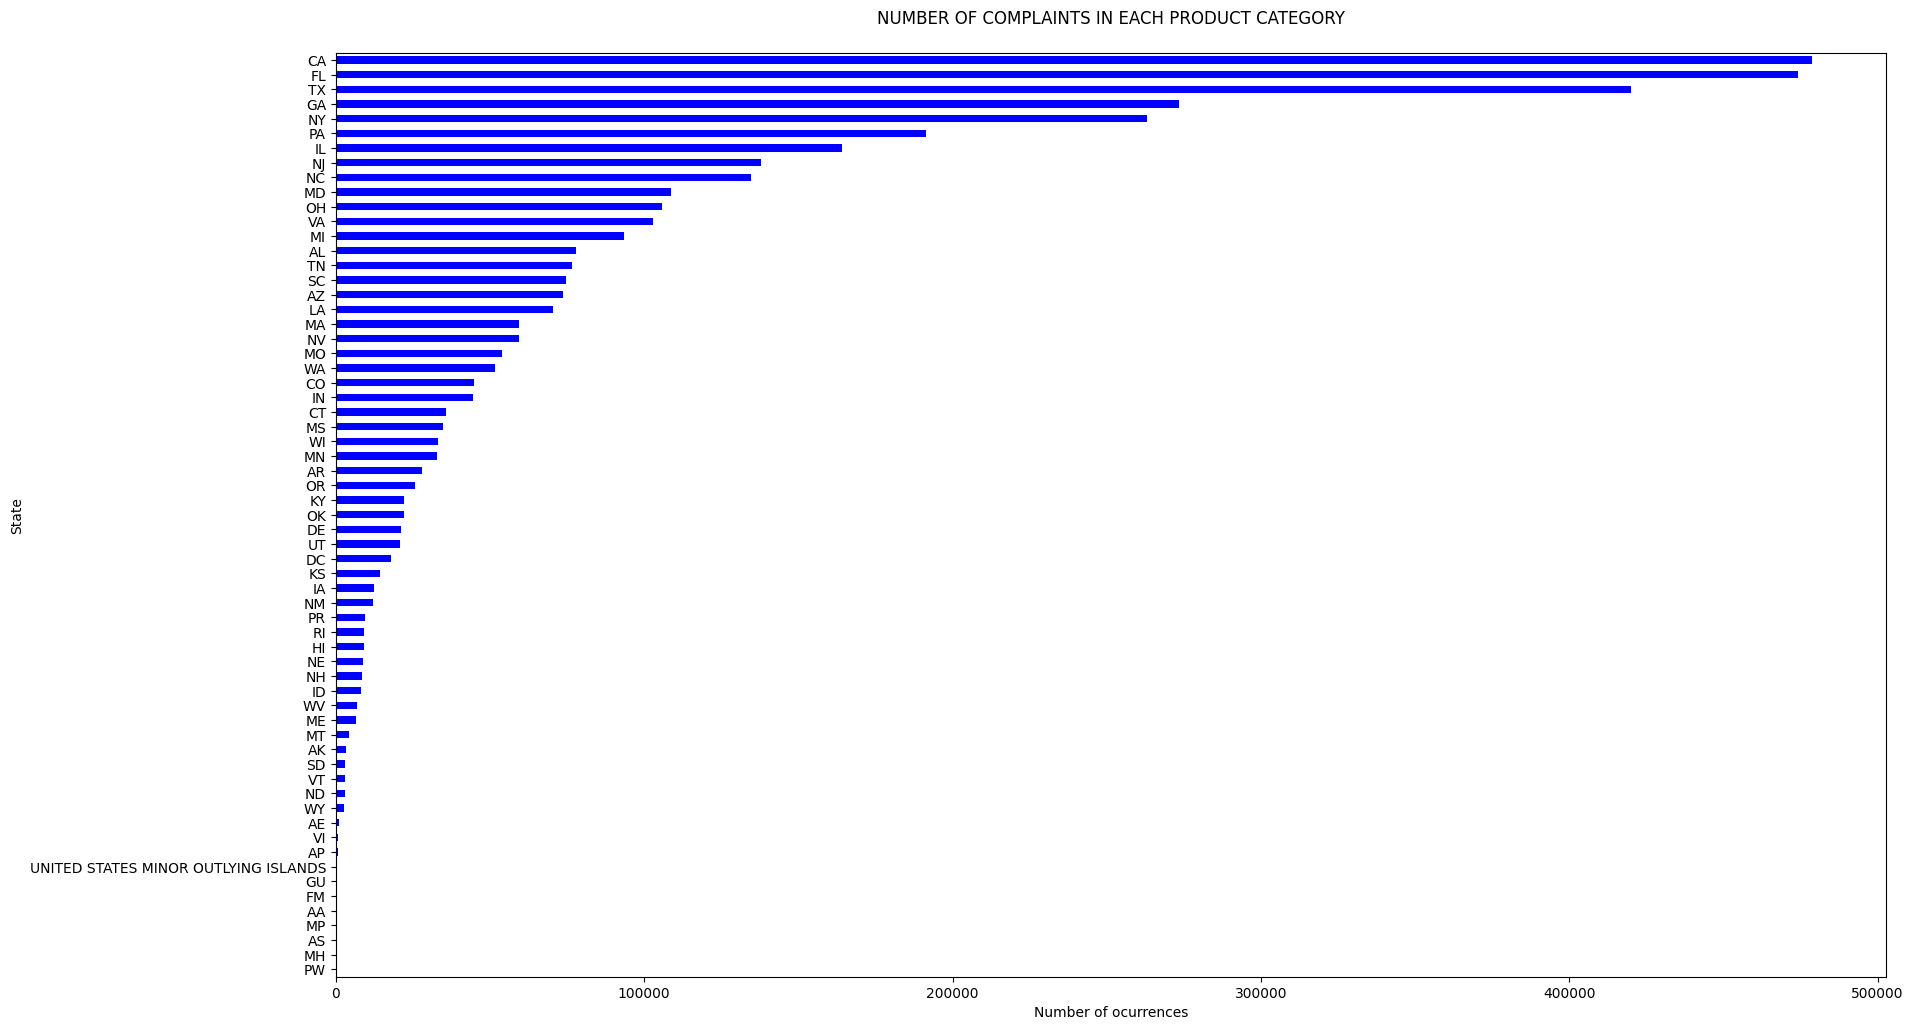

In [7]:
fig = plt.figure(figsize=(20,12))
df.groupby(['State'])['Complaint ID'].count().sort_values().plot.barh(
    ylim=0, color='blue', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

California has the highest number of complaints as compared to others. Let's see what are these complaints about.

In [8]:
df[df['State'] == 'CA']['Product'].value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    221639
Mortgage                                                                         61992
Debt collection                                                                  57255
Credit card or prepaid card                                                      29738
Checking or savings account                                                      26581
Credit reporting                                                                 18119
Credit card                                                                      12635
Bank account or service                                                          12163
Money transfer, virtual currency, or money service                                8220
Student loan                                                                      7910
Credit reporting or other personal consumer reports                               7483
Vehicle loan or lease              

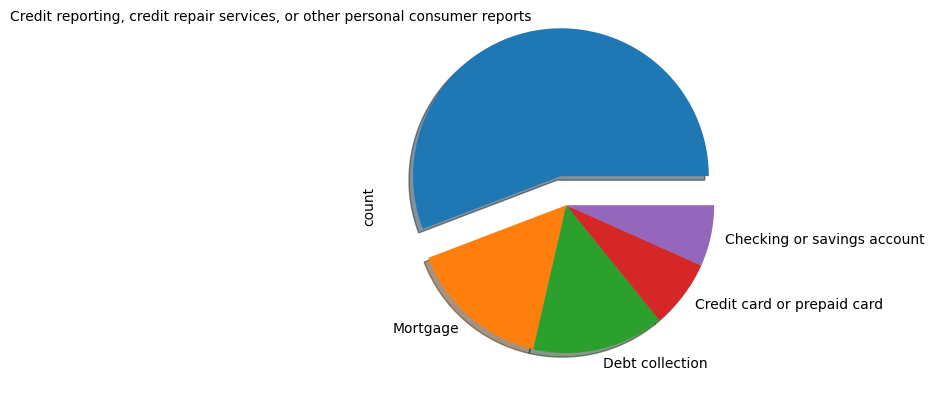

In [9]:
df[df['State'] == 'CA']['Product'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

The state of California mainly has most complaints around Mortgage. Let's find out what kind of issues are raised for this particular product.

In [10]:
df[df['State'] == 'CA']['Issue'].value_counts().head(10)

Issue
Incorrect information on your report                                                119136
Problem with a credit reporting company's investigation into an existing problem     57647
Improper use of your report                                                          46818
Loan modification,collection,foreclosure                                             22281
Attempts to collect debt not owed                                                    19955
Managing an account                                                                  16677
Incorrect information on credit report                                               12994
Loan servicing, payments, escrow account                                             11195
Trouble during payment process                                                        9504
Cont'd attempts collect debt not owed                                                 8452
Name: count, dtype: int64

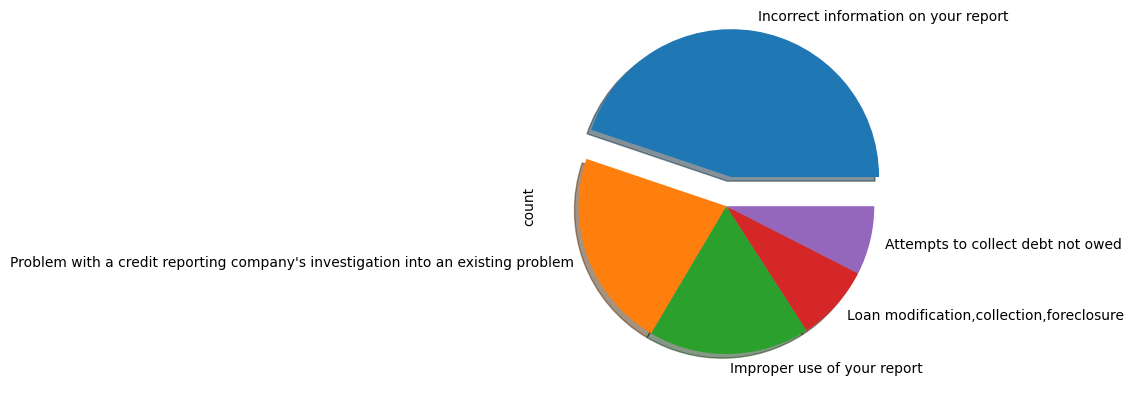

In [11]:
df[df['State'] == 'CA']['Issue'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

The primary issues for all the complaints in California are Loan modification,collection,foreclosure,Loan servicing, payments, escrow account.

Let's take a look at the various product types.

In [12]:
p_product_discussions = round(df["Product"].value_counts() / len(df["Product"]) * 100,2)

print(p_product_discussions)

labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

Product
Credit reporting, credit repair services, or other personal consumer reports    52.82
Debt collection                                                                 12.36
Mortgage                                                                         9.37
Credit card or prepaid card                                                      5.03
Checking or savings account                                                      4.46
Credit reporting                                                                 3.42
Credit card                                                                      2.25
Bank account or service                                                          2.10
Student loan                                                                     1.87
Credit reporting or other personal consumer reports                              1.78
Money transfer, virtual currency, or money service                               1.44
Vehicle loan or lease                         

In [13]:
# Building the variables for our graphs
disputed = df['Consumer disputed?'].value_counts()
company_response = df['Company response to consumer'].value_counts()
top5_disputed = df['Company'].loc[df['Consumer disputed?'] == 'Yes'].value_counts()[:5]
top5_nodispute = df['Company'].loc[df['Consumer disputed?'] == 'No'].value_counts()[:5]

In [14]:

# Top three subplots
total_complaints_plotly = go.Bar(
            x=disputed.index.values,
            y=disputed.values,
    text = 'Complaints',
    showlegend=False,
    marker=dict(
        color=['#40FF00', '#FF0000'])
    )

top5_disputes_plotly = go.Bar(
            x=top5_disputed.index.values,
            y=top5_disputed.values,
    text='Disputes',
    showlegend=False,
    marker=dict(
        color=top5_disputed.values,
        colorscale='Reds')
    )

top5_nodisputes_plotly = go.Bar(
            x=top5_nodispute.index.values,
            y=top5_nodispute.values,
    text='No Disputes',
    showlegend=False,
    marker=dict(
        color=top5_nodispute.values,
        colorscale='Blues')
    )

# Lower Subplot
customer_res_plotly = go.Bar(
            x=company_response.index.values,
            y=company_response.values,
    text='Customer Response',
    showlegend=False,
        marker=dict(
        color=df['Company response to consumer'].value_counts().values,
        colorscale = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], 
                      [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], 
                      [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], 
                      [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], 
                      [1.0, 'rgb(49,54,149)']],
        reversescale = True
        )
)

fig = tls.make_subplots(rows=2, cols=3, specs=[[{}, {}, {}], [{'colspan': 3}, None, None]],
                          subplot_titles=('Did the Customer Disputed?',
                                          'Disputes',
                                         'No Disputes',
                                         'Company response to consumer'))

# First three Subplots
fig.append_trace(total_complaints_plotly, 1, 1)
fig.append_trace(top5_disputes_plotly , 1, 2)
fig.append_trace(top5_nodisputes_plotly , 1, 3)

# Lower Subplot
fig.append_trace(customer_res_plotly, 2, 1)



fig['layout'].update(showlegend=True, height=600, width=800, title='Sectors')
iplot(fig, filename='Complaints')

C:\Users\laxmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [15]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['year_received'], df['month_received'] = df['Date received'].dt.year, df['Date received'].dt.month
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year_received,month_received
0,2023-07-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Nelnet, Inc.",IL,61103,NaN,NaN,Web,2023-08-23,Closed with explanation,Yes,NaN,7284490,2023,7
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,33444,NaN,NaN,Web,2023-08-25,Closed with non-monetary relief,Yes,NaN,7588176,2023,8
2,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639,2023,8
3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160,2023,8
4,2023-08-23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Information that should be on the report is mi...,NaN,NaN,LEXISNEXIS,FL,32258,NaN,Other,Web,2023-08-23,In progress,Yes,NaN,7442688,2023,8


In [16]:
# Create a Line Plot by the top 5 companies  by year who had more customer interaction cases (Disputes and No Disputes)
sorting_groups = df.groupby(['year_received', 'Consumer disputed?'])['Company'].apply(lambda x: x.value_counts())
d = {'CRM': sorting_groups}


year_crm = pd.DataFrame(data=d).reset_index()
year_crm.sort_values(by='CRM', ascending=False)

crm_df = year_crm.rename(columns={"level_2": "Company"})

# Conditionals Top 5 Companies with dispues (Bank of America, Wells Fargo, JP Morgan, Equifax, CitiBank)
boa_disputes = crm_df.loc[(crm_df['Company'] == 'Bank of America') & (crm_df['Consumer disputed?'] == 'Yes')]
wfc_disputes = crm_df.loc[(crm_df['Company'] == 'Wells Fargo & Company') & (crm_df['Consumer disputed?'] == 'Yes')]
jp_disputes = crm_df.loc[(crm_df['Company'] == 'JPMorgan Chase & Co.') & (crm_df['Consumer disputed?'] == 'Yes')]
equi_disputes = crm_df.loc[(crm_df['Company'] == 'Equifax') & (crm_df['Consumer disputed?'] == 'Yes')]
citi_disputes = crm_df.loc[(crm_df['Company'] == 'Citibank') & (crm_df['Consumer disputed?'] == 'Yes')]

# Establish the year (Continue Here tomorrow!)
years = boa_disputes['year_received'].values.tolist()

In [17]:
crm_df.head()

,year_received,Consumer disputed?,Company,CRM
0,2011,No,"BANK OF AMERICA, NATIONAL ASSOCIATION",431
1,2011,No,JPMORGAN CHASE & CO.,298
2,2011,No,"CITIBANK, N.A.",255
3,2011,No,CAPITAL ONE FINANCIAL CORPORATION,201
4,2011,No,WELLS FARGO & COMPANY,170


In [18]:
# Implementing line chart (top 5 companies with complaints)
boa_disputes_amount = boa_disputes['CRM'].values.tolist()
wfc_disputes_amount = wfc_disputes['CRM'].values.tolist()
jp_disputes_amount = jp_disputes['CRM'].values.tolist()
equi_disputes_amount = equi_disputes['CRM'].values.tolist()
citi_disputes_amount = citi_disputes['CRM'].values.tolist()

# Text to add
boa_text = [str(dis) + '\n Disputes'  for dis in boa_disputes_amount]
wfc_text = [str(wfc) + '\n Disputes'  for wfc in wfc_disputes_amount]
jp_text = [str(jp) + '\n Disputes' for jp in jp_disputes_amount]
equi_text = [str(equi) + '\n Disputes' for equi in equi_disputes_amount]
citi_text = [str(citi) + '\n Disputes' for citi in citi_disputes_amount]

boa_disputes_chart = go.Scatter(
    x=years,
    y=boa_disputes_amount,
    text=boa_text,
    name='Bank of America', 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(0, 22, 235)',
             ),
    fill='tonexty'
)

wfc_disputes_chart = go.Scatter(
    x=years,
    y=wfc_disputes_amount,
    text=wfc_text,
    name="Wells Fargo & Company", 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(275, 170, 0)',
             ),
    fill='tonexty'
)


jp_disputes_chart = go.Scatter(
    x=years,
    y=jp_disputes_amount,
    text=jp_text,
    name='JP Morgan Chase & Co.',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(128, 128, 128)',
             ),
    fill='tonexty'
)

equi_disputes_chart = go.Scatter(
    x=years,
    y=equi_disputes_amount,
    text=equi_text,
    name='Equifax',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(175, 0, 0)',
             ),
    fill='tonexty'
)

citi_disputes_chart = go.Scatter(
    x=years,
    y=citi_disputes_amount,
    text=citi_text,
    name='CitiBank',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(0, 215, 215)',
             ),
    fill='tonexty'
)

data = [boa_disputes_chart, wfc_disputes_chart, jp_disputes_chart, equi_disputes_chart, citi_disputes_chart]

layout = dict(title = 'Number of Disputes <br> (Top 5 Companies)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Number of Disputes')
             )


fig = dict(data=data, layout=layout)


iplot(fig, filename='basic-area-no-bound')

Overall the number of Complaints have gone down for all the top 5 Companies.

In [19]:
# Months with the highest disputes (We will make a barplot)
def customerservice_per_month(month, dispute):
    result = df.loc[(df['month_received'] == month) & (df['Consumer disputed?'] == dispute)]
    return result

# Monthly Disputes
dis_january = len(customerservice_per_month(month=1, dispute='Yes'))
dis_february = len(customerservice_per_month(month=2, dispute='Yes'))
dis_march = len(customerservice_per_month(month=3, dispute='Yes'))
dis_april = len(customerservice_per_month(month=4, dispute='Yes'))
dis_may = len(customerservice_per_month(month=5, dispute='Yes'))
dis_june = len(customerservice_per_month(month=6, dispute='Yes'))
dis_july = len(customerservice_per_month(month=7, dispute='Yes'))
dis_august = len(customerservice_per_month(month=8, dispute='Yes'))
dis_september = len(customerservice_per_month(month=9, dispute='Yes'))
dis_october = len(customerservice_per_month(month=10, dispute='Yes'))
dis_november = len(customerservice_per_month(month=11, dispute='Yes'))
dis_december = len(customerservice_per_month(month=12, dispute='Yes'))

# Monthly No-Disputes
nodis_january = len(customerservice_per_month(month=1, dispute='No'))
nodis_february = len(customerservice_per_month(month=2, dispute='No'))
nodis_march = len(customerservice_per_month(month=3, dispute='No'))
nodis_april = len(customerservice_per_month(month=4, dispute='No'))
nodis_may = len(customerservice_per_month(month=5, dispute='No'))
nodis_june = len(customerservice_per_month(month=6, dispute='No'))
nodis_july = len(customerservice_per_month(month=7, dispute='No'))
nodis_august = len(customerservice_per_month(month=8, dispute='No'))
nodis_september = len(customerservice_per_month(month=9, dispute='No'))
nodis_october = len(customerservice_per_month(month=10, dispute='No'))
nodis_november = len(customerservice_per_month(month=11, dispute='No'))
nodis_december = len(customerservice_per_month(month=12, dispute='No'))

In [20]:
# Most active months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']
disputes_by_month = [dis_january, dis_february, dis_march, dis_april, dis_may, dis_june, dis_july, dis_august, dis_september,
                    dis_october, dis_november, dis_december]

nodisputes_by_month = [nodis_january, nodis_february, nodis_march, nodis_april, nodis_may, nodis_june, nodis_july, 
                       nodis_august, nodis_september, nodis_october, nodis_november, nodis_december]


disputes_chart = go.Bar(
    y=months,
    x=disputes_by_month,
    orientation='h',
    name='Disputes',
    text='Disputes',
    marker=dict(
        color='#FF6464',
    line=dict(
        color='#CD3232',
        width=1.5
    ))
)

nodisputes_chart = go.Bar(
    y=months,
    x=nodisputes_by_month,
    orientation='h',
    name='No Disputes',
    text='No Disputes',
    marker=dict(
        color='#A9FFA9',
    line=dict(
        color='#59AF59',
        width=1.5
    ))
)

fig = tls.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Dispute Chart per Month',
                                          'No Dispute Chart per Month'))

fig.append_trace(disputes_chart, 1, 1)
fig.append_trace(nodisputes_chart, 1, 2)

fig['layout'].update(showlegend=True, title="Level of Activity by Month")
iplot(fig)

C:\Users\laxmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



July receives the most number of disputes during the year while March receives the lowest number of disputes.

In [21]:
df.groupby(['Company'])['Complaint ID'].count().sort_values(ascending=False).head(5)

Company
EQUIFAX, INC.                             785701
TRANSUNION INTERMEDIATE HOLDINGS, INC.    700909
Experian Information Solutions Inc.       642661
BANK OF AMERICA, NATIONAL ASSOCIATION     131797
WELLS FARGO & COMPANY                     119951
Name: Complaint ID, dtype: int64

In [22]:
dispute_presence = df.loc[df['Consumer disputed?'] == 'Yes']
cross_month = pd.crosstab(dispute_presence['State'], dispute_presence['Company']).apply(lambda x: x/x.sum() * 100)

Bank of America has the highest number of complaints among all the other companies. Lets see where are these complains from.

In [ ]:
#  Share of Most disputes for Bank of America.
df_boa = pd.DataFrame(cross_month['Bank of America']).reset_index().sort_values(by="Bank of America", ascending=False).round(2)
df_boa = df_boa.rename(columns={'Bank of America': 'share of complaints'})

for col in df_boa.columns:
    df_boa[col] = df_boa[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(255, 39, 39)'],[1.0, 'rgb(219, 0, 0)']]


df_boa['text'] = "State Code: " + df_boa['State'] + '<br>'


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_boa['State'],
        z = df_boa['share of complaints'], 
        locationmode = 'USA-states',
        text = df_boa['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
    title = 'Most Complaints by State <br> Bank of America',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

In [ ]:
df[df['Company'] == 'Bank of America']['Product'].value_counts()

Thus, most of the complaints that Bank of America receives are regarding Mortgages.


In [ ]:
len(df[df['Timely response?'] == 'Yes'])/len(df['Timely response?'])

As we can see, the Timely response rate is quite high. Let's how it impacts the Consumer Disputes.

In [ ]:
df[(df['Timely response?'] == 'Yes') & (df['Consumer disputed?'] == 'Yes')]['Company'].value_counts().head(10)

In [ ]:
len(df[(df['Timely response?'] == 'Yes') & (df['Consumer disputed?'] == 'Yes')])/len(df[df['Consumer disputed?'] == 'Yes'])

We can see that for most of the companies the Consumer disputed after the timely response.

In [ ]:
df[(df['Timely response?'] == 'No') & (df['Consumer disputed?'] == 'Yes')]['Company'].value_counts().head(10)

In [ ]:
len(df[(df['Timely response?'] == 'No') & (df['Consumer disputed?'] == 'Yes')])/len(df[df['Consumer disputed?'] == 'Yes'])

The number of disputes after a delay in response in really low. However, this does not signify that late responses will not attract dispute. It may mean that the consumers issue is either resolved or he is no longer interested in the issue.

In [ ]:
Complaints_by_products = df.groupby(['Product'])['Complaint ID'].count().sort_values(ascending=False)
fig = plt.figure(figsize=(8,6))
Complaints_by_products.plot.barh(ylim=0,color='blue',title= 'Customer Complaints By Products\n')
plt.xlabel('No of Complaints')

In [ ]:
df[df['Product'] == 'Mortgage']['Issue'].value_counts()

We can see that most of the complaints for Mortgage were regarding Loan modification,collection,foreclosure,Loan servicing, payments, escrow account. 

In [ ]:
submitted_via_df = df['Submitted via'].value_counts()
fig = plt.figure(figsize=(8,6))
submitted_via_df.plot.pie(title= 'How the Customers Complaints were submitted\n',explode=[0.2,0,0,0,0,0],shadow=True)
plt.xlabel('')

More than half of the Users submitted their complaints via web.

In [ ]:
Issue_df = df['Issue'].value_counts().head(10)
fig = plt.figure(figsize=(8,6))
Issue_df.plot.barh(ylim=0, color='blue', title= 'Consumer Complaint Issues\n')
plt.xlabel('No of Complaints')

Let's understand how the No of Complaints changed over the years and months.

# Part 2 : TEXT BASED MODELLING

The dataset contains features that are not necessary to solve our multi-classification problem. For this text classification problem, we are going to build another dataframe that contains ‘Product’ and ‘Consumer complaint narrative’ (renamed as 'Consumer_complaint').

In [ ]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

In [ ]:
# Percentage of complaints with text
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

From more than 358810 complaints, there are about 56180 cases with text (~ 15.7% of the original dataset is not null). This is still a good number to work with. Now let's have a look at the categories we want to classify each complaint.

In [ ]:
pd.DataFrame(df.Product.unique()).values

There are 12 different classes or categories (target). However; it is observed that some classes are contained in others. For instance, ‘Credit card’ and ‘Prepaid card’ are contained in ‘Credit card or prepaid card’ category. Now, imagine there is a new complaint about Credit card and we want to classify it. The algorithm can either classify this complaint as 'Credit card' or 'Credit card or prepaid' and it would be correct. Nevertheless, this would affect model performance. In order to avoid this problem, the names of some categories were renamed.

In [ ]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df1.sample(10000, random_state=1).copy()

In [ ]:
# Renaming categories
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [ ]:
pd.DataFrame(df2.Product.unique())

The number of classes were reduced from 12 to 10. <br><br>Now we need to represent each class as a number, so as our predictive model can better understand the different categories.

In [ ]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()

In [ ]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color='Blue', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

<a id='pre'></a>
## Text Preprocessing :

The text needs to be transformed to vectors so as the algorithms will be able make predictions. In this case it will be used the Term Frequency – Inverse Document Frequency (TFIDF) weight to evaluate __how important a word is to a document in a collection of documents__.

After removing __punctuation__ and __lower casing__ the words, importance of a word is determined in terms of its frequency.

### “Term Frequency – Inverse Document Frequency 

__TF-IDF__ is the product of the __TF__ and __IDF__ scores of the term.<br><br> $$\text{TF-IDF}=\frac{\text{TF}}{\text{IDF}}$$<br>

__Term Frequency :__ This summarizes how often a given word appears within a document.

$$\text{TF} = \frac{\text{Number of times the term appears in the doc}}{\text{Total number of words in the doc}}$$<br><br>
__Inverse Document Frequency:__ This downscales words that appear a lot across documents. A term has a high IDF score if it appears in a few documents. Conversely, if the term is very common among documents (i.e., “the”, “a”, “is”), the term would have a low IDF score.<br>

$$\text{IDF} = \ln\left(\frac{\text{Number of docs}}{\text{Number docs the term appears in}} \right)$$<br>

TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The higher the TFIDF score, the rarer the term is. For instance, in a Mortgage complaint the word _mortgage_ would be mentioned fairly often. However, if we look at other complaints, _mortgage_ probably would not show up in many of them. We can infer that _mortgage_ is most probably an important word in Mortgage complaints as compared to the other products. Therefore, _mortgage_ would have a high TF-IDF score for Mortgage complaints.

TfidfVectorizer class can be initialized with the following parameters:
* __min_df__: remove the words from the vocabulary which have occurred in less than ‘min_df’ number of files.
* __max_df__: remove the words from the vocabulary which have occurred in more than _‘max_df’ * total number of files in corpus_.
* __sublinear_tf__: set to True to scale the term frequency in logarithmic scale.
* __stop_words__: remove the predefined stop words in 'english'.
* __use_idf__: weight factor must use inverse document frequency.
* __ngram_range__: (1, 2) to indicate that unigrams and bigrams will be considered.

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

In [ ]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

<a id='ml'></a>
## Multi-Classification models : 

The classification models evaluated are: 
* Random Forest
* Linear Support Vector Machine
* Multinomial Naive Bayes 
* Logistic Regression.

<a id='sp'></a>
### Spliting the data into train and test sets
The original data was divided into features (X) and target (y), which were then splitted into train (75%) and test (25%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

In [ ]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

<a id='m'></a>
## Models:

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

<a id='sum'></a>
## Comparison of model performance

The best mean acuracy was obtained with LinearSVC.

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

<a id='ev'></a>
## Model Evaluation :

In [ ]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
df2.head()

In [ ]:
df2['category_id'].unique()

<a id='m'></a>
## Precision, Recall, F1-score :

In [ ]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['Product'].unique()))

<a id='cm'></a>
## Confusion Matrix : 

A Confusion Matrix is a table which rows represent the actual class and columns represents the predicted class.<br><br>
If we had a perfect model that always classifies correctly a new complaint, then the confusion matrix would have values in the diagonal only (where predicted label = actual label).

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In general, the confusion matrix looks good (clear diagonal that represents correct classifications). Nevertheless, there are cases were the complaint was classified in a wrong class.

## Misclassified complaints :
Let’s have a look at the cases that were wrongly classified.

In [ ]:
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 20:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
                                                           id_to_category[predicted], 
                                                           conf_mat[actual, predicted]))
    
      display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 
                                                                'Consumer_complaint']])
      print('')

#### Most correlated terms with each category : 

In [ ]:
model.fit(features, labels)

N = 4
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("\n==> '{}':".format(Product))
  print("  * Top unigrams: %s" %(', '.join(unigrams)))
  print("  * Top bigrams: %s" %(', '.join(bigrams)))

<a id='pred'></a>
# Predictions :

Now let's make a few predictions on unseen data.<br>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

Let's see what is the classification that our model gives to this new complaint.

In [ ]:
new_complaint = """I have been enrolled back at XXXX XXXX University in the XX/XX/XXXX. Recently, i have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the XX/XX/XXXX."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

The algorithm has classified this text as a "Student loan" complaint. The complaint is regarding Student Loans and it has predicted it correctly.

In [ ]:
new_complaint_2 = """I have been getting robo calls from a debt collection agency called " Alliance 1 \'\' for over XXXX months. 
The calls average XXXX times per week. They are attempting to collect a debt for someone whose name sounds 
like " XXXX XXXX \'\'. I am sick and tired of their harrassement and want the calls to stop. \n"""
print(model.predict(fitted_vectorizer.transform([new_complaint_2])))

Again, the algorithm correctly classified the caomplaint as __"Debt collection"__. 
Although our model is not going to be all the time correct when classifying new complaints, it does a good job.

In [ ]:
test_df = pd.read_csv('../input/consumer-complaints-test-dataset/Edureka_Consumer_Complaints_test.csv')
test_df.shape

In [ ]:
test_df.head().T

In [ ]:
# Create a new dataframe with two columns
df3 = test_df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df3 = df3[pd.notnull(df3['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df3.columns = ['Product', 'Consumer_complaint'] 

df3.shape

In [ ]:
# Percentage of complaints with text
total = df3['Consumer_complaint'].notnull().sum()
round((total/len(test_df)*100),1)

In [ ]:
pd.DataFrame(df3.Product.unique()).values

In [ ]:
pd.DataFrame(df2.Product.unique()).values

In [ ]:
# Renaming categories
df3.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [ ]:
pd.DataFrame(df2.Product.unique())

In [ ]:
df3.head()

In [ ]:
Predictions = model.predict(fitted_vectorizer.transform(df3['Consumer_complaint']))
Predictions.shape

Shape of the Predictions is same as the test date i.e no of rows.

In [ ]:
Predictions_df = pd.DataFrame(Predictions,columns=['Predictions']).reset_index()
Predictions_df.to_csv('predictions.csv',index=False)

Transferring the Predictions to predictions.csv.

In [ ]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(df3['Product'], Predictions, 
                                    target_names= df3['Product'].unique()))

The model is predicting most of categories correctly with an accuracy of around 0.80.

In [ ]:
conf_mat = confusion_matrix(df3['Product'], Predictions)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [ ]:
df3['Consumer_complaint'].iloc[0]

In [ ]:
df3[df3['Consumer_complaint'] == df3['Consumer_complaint'].iloc[0]]

In [ ]:
complaint1 = """I WANT TO REQUEST A CREDIT LINE INCREASE OF XXXX I FELL I HAVE THE RIGHT CREDIT LINE DO TO MY INCOME AND THE LADY FROM CAPITAL ONE SAID IT IS BASED OFF INCOME 
AND ALSO DUE TO THE FACT THEY HAVE NOT MAILED MY CREDIT CARD TO ME YET AFTER I CALLED AND TOLD THEM TO. \n"""

In [ ]:
print(model.predict(fitted_vectorizer.transform([complaint1])))

It has predicted the first complaint correctly.

In [ ]:
df3[df3['Consumer_complaint'] == df3['Consumer_complaint'].iloc[16]]

In [ ]:
df3['Consumer_complaint'].iloc[16]

In [ ]:
complaint2 = """I have been actively filing loan modifications with B of A sinceXXXX. I am a XXXX Veteran and I did use my VA certificateto secure my home in XXXX. My home was finance thruCountry Wide before B of A bought my loan. B of A didservice my home for foreclosure while I was serving in theXXXX XXXX about XXXX XXXX and the loan was noteven 2 months behind. I came home in XXXX XXXX andrequested another loan modification but no response soI obtained an attorney. My attorney did respond to B ofA and requested all correspondence concerning my homebe sent to them and they were actively involved with myloan modification. In early XXXX I was notified by areal-estate agent that my home was listed for foreclosureand public auction. No XXXX service me or my attorney. Theforeclosure was listed in the local newspaper. This wasnews to me and my attorney since we both had no ideaand was actively involve with a loan modification at thetime. I have since been working with Attorney Generaloffice in Florida. I was given guidance from the AG tofile this complaint with CFPB along with their inquireabout my case. I have been told my request formodification has been denied for reasons such as \'\' I was not living in the home and it is a VA require-ment \'\' which is not true, " insufficient income \'\', mycurrent husband signed a form stating he wouldcontribute {$1500.00} additional income to my household to help cover the cost and the list goes on. \nI am currently enrolled in a XXXX programwith the XXXX VA and is receivingtreatment. My condition is described as " XXXX \'\' at this time but with support from my husbandand adult children I am trying to do what isnecessary to keep my home. I am filing thiscomplaint because I too believe I am a victimof " dual tracking \'\' with B of A. They are notowning up to their constant mistakes. I don\'tunderstand why they will not work with me tohelp me keep my home vice foreclosing. I amnot trying to run from my responsibility of payingfor my home. I just need help with lowering the payment so I can afford it. Is that too much to ask for? \nB of A pulled back the foreclosure because they justrealized we were working on a loan modification with mebut recently filed a petition in court another foreclosure. \nI have no other option but to file bankruptcy to keepmy home. This not fair to me the consumer because allI wanted was a lower payment. \n"""

In [ ]:
print(model.predict(fitted_vectorizer.transform([complaint2])))

It has predicted the second complaint correctly as well. Thus, the model is doing a good job in predicting the product category using the Consumer Complaint narratives.

# Part 3 : CLASSIFICATION MODELS AND FEATURE ENGINEERING

In [ ]:
df = pd.read_csv('/kaggle/input/consumer-complaints-train-dataset/Edureka_Consumer_Complaints_train.csv')

In [ ]:
df.head(5).T

In [ ]:
df.shape

In [ ]:
df1 = df.copy()

Making a copy of the dataset to perform the operations and prepare a good dataset for training and testing.

In [ ]:
df1.drop(['Date received','Date sent to company','Sub-product','Issue', 
          'Sub-issue','Consumer complaint narrative','ZIP code','Complaint ID'],axis=1,inplace=True)

Dropping Sub-product,Issue, Sub-issue as all of them are related to the Product Column. Dropping the Date columns as they don't have much contribution and the same goes for ZIP code and Complaint ID.

In [ ]:
df1.shape

In [ ]:
df1.isnull().sum()

We can see that there a lot of null values in the Dataset.

In [ ]:
df1['Company public response'].value_counts()

The most common company response is Company chooses not to provide a public response which we can use to fill the remaining NA values.

In [ ]:
df1['Consumer consent provided?'].value_counts()

In Consumer consent provided? column Other seems to be a neutral column that can be used to fill in the NA values.

In [ ]:
df1['Tags'].value_counts()

The information available is very less and there is no neutral value that we can use to fill the NA values. 

In [ ]:
df1.drop(['Tags'],axis=1,inplace=True)

Dropping the Tags column.

In [ ]:
df1.shape

In [ ]:
df1['Company public response'].notnull().sum()

In [ ]:
df1['Consumer consent provided?'].fillna('Other',inplace=True)

Filling the NA values in **Consumer consent provided?** with **'Other'**.

In [ ]:
df1['Consumer consent provided?'].isnull().sum()

In [ ]:
df1.isnull().sum()

In [ ]:
df1['Company public response'].fillna('Company chooses not to provide a public response',inplace=True)

Filling the NA values in Company public response column with **'Company chooses not to provide a public response'**.

In [ ]:
df1.isnull().sum()

There are NA values in the state columns and it is something we can't just fill in randomly. Hence, dropping those NA values.

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.shape

There are **355907** after cleaning which a really good number to work on.

In [ ]:
df1.head(5).T

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = df1.apply(LabelEncoder().fit_transform)

Converting all the object columns using ****Label Encoder()****.

In [ ]:
df1.info()

Let's have a look at the dataset after conversion.

In [ ]:
df1.head()

Because the computation is time consuming (in terms of CPU), the data was sampled.

In [ ]:
df2 = df1.sample(10000, random_state=1).copy()

In [ ]:
df2['Consumer disputed?'].value_counts()

We can conclude that the data isn't balanced.

# Model Building :

* Let's define our **X** and **Y** and start working on the training the model.

In [ ]:
X = df2.drop(['Consumer disputed?'],axis=1)
y = df2['Consumer disputed?']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

Since it is an **imbalanced dataset**, we will set the <b>class_weight</b> parameter to 'balanced'

In [ ]:
log_reg = LogisticRegression(random_state=101,class_weight='balanced')

In [ ]:
log_reg.fit(X_train,y_train)

In [ ]:
predictions = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import seaborn as sns
print(metrics.accuracy_score(y_test,predictions))
print('********************************************')
print('Confusion matrix')
lr_cfm=metrics.confusion_matrix(y_test, predictions)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(lr_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('**********************************************')
print(metrics.classification_report(y_test,predictions))

The overall accuracy is less and the precision and f1-score is really low for 1. Let's try out other methods.

In [ ]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The accuracy can be low due to the fact that there are a lot of <b>categorical variables</b> in the dataset. As there is a lot of <b>non-linearity</b>, let us use <b>tree</b> algorithms.

# Random Forest :

We will try the <b>Bagging</b> technique <b>Random Forest</b> on the dataset. Since we do not know the optimal hyperparameters for the forest, let us use GridSearch cross-validation to identify them.

# Grid Search :

Here are the parameters for <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV'>GridSearchCV</a>:
- __estimator__: `model`
- __param_grid__: `dist or list of dictionaries` Parameters to the estimator/model
- __scoring__: `string,callable, list/tuple, dict or None, default: None` Evaluating metrics
- __cv__: `int or callable` Cross validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_grid = {'n_estimators': range(5,20,3),
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : [5,10,20,30],
              'min_samples_split':[2,5,10],
              'criterion':['entropy'],
              'min_samples_leaf':[1,2,4]}

rf=RandomForestClassifier(oob_score=True,class_weight='balanced')
rf_gs = GridSearchCV(rf, random_grid, cv = 5, n_jobs=-1, verbose=2)

rf_gs.fit(X_train, y_train)
y_pred = rf_gs.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred))
print('*******************************************')
print('Confusion matrix')
rf_cfm=metrics.confusion_matrix(y_test, y_pred)

lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(rf_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('********************************************')
print(metrics.classification_report(y_test,y_pred))

The accuracy has surely increased ! But hold on...we need to remember that it is an imbalanced dataset. Let us calculate the null accuracy.

In [ ]:
# Actual Values of y_test
print (y_test.value_counts())
print ("Null Accuracy:",y_test.value_counts().head(1) / len(y_test))

Null accuracy itself is **0.79**. So our accuracy of **0.72** is less than that. Also, as discussed earlier, **f1-score** is more important in these scenarios. But even that is pretty low. By the way, is f1-score still the right metric in this scenario?

For imbalanced datasets, ROC_AUC is considered to be a more relevant metric than f1-score and accuracy as it is independent of threshold value.

In [ ]:
predict_probabilities = rf_gs.predict_proba(X_test)
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

Now, this is a metric that makes sense. We should get the **ROC_AUC** score as close to 1 as possible. Let us now see how Boosting algorithms fare.

# XGBoost : 

In [ ]:
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(num_class = 2,
                           objective="multi:softprob",
                           eval_metric="mlogloss",
                           seed=42) 

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
xgboost_pred=xgb_model.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,xgboost_pred))
print('************')
print('Confusion matrix')
xgboost_cm=metrics.confusion_matrix(y_test, xgboost_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(xgboost_cm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('************\n Classification report')
print(metrics.classification_report(y_test,xgboost_pred))

We are at a pretty good accuracy of 0.80 which is slightly higher than our Null Accuracy of 0.79 though the recall and f1-score of 1 is 0.

In [ ]:
predict_probabilities = xgb_model.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

Hurray! <b>Xgboost</b> gave us a higher ROC_AUC score compared to Random Forest. Let us see if we can make this better by tuning the real strengths of Xgboost - its <b>Hyperparameters.</b> 

# XgBoost with Grid Search :

In [ ]:
xgb_gs_clf = XGBClassifier(num_class = 2,
                           objective="multi:softprob",
                           eval_metric="mlogloss",
                           seed=42)                         
                        
param_grid = {"max_depth": [10,15,20],
              "n_estimators": range(5,20,5) , 
              "gamma": [0.03,0.05], 
              "learning_rate": [0.01,0.05]}
#              "min_child_weight": [5,10], 
#              "colsample_bytree": [0.4,0.8], 
#              "subsample": [0.50,0.85]} 

grid_search = GridSearchCV(xgb_gs_clf, 
                           param_grid=param_grid,
                           cv = 5,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

In [ ]:
xgboost_y_pred=grid_search.predict(X_test)    

In [ ]:
print(metrics.accuracy_score(y_test,xgboost_y_pred))
print('*************************************************')
print('Confusion matrix')
xgboost_cfm=metrics.confusion_matrix(y_test, xgboost_y_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(xgboost_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('***************************************************\n Classification report')
print(metrics.classification_report(y_test,xgboost_y_pred))

In [ ]:
predict_probabilities = grid_search.predict_proba(X_test)
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

There is no improvement over the earlier Xgboost model. Let's try out with <b>more hyperparameter combinations</b> and see if there is a jump in the roc_auc value.

# LightGBM :

In [ ]:
import lightgbm as lgb

d_train= lgb.Dataset(X_train, label = y_train) 

In [ ]:
params = {}
params['learning_rate'] = 0.001                                             # Learning rate
params['boosting_type'] = 'gbdt'                                           # gbdt = gradient boosted decision tree
params['objective'] = 'multiclass'                                         # Multi class classification
params['metric'] = 'multi_logloss'
params['num_classes'] = 5 
params['eval_metric']='auc', 'binary_logloss'
#params['sub_feature'] = 0.5
#params['min_data'] = 50
#params['max_depth'] = 10


clf = lgb.train(params, d_train)     

In [ ]:
#Prediction
y_pred=clf.predict(X_test)

In [ ]:
clf.params

In [ ]:
predictions = []
predictions_proba = []
for x in y_pred:
    predictions.append(np.argmax(x))
    predictions_proba.append(max(x))

In [ ]:
lgb_y_pred = np.array(predictions)

In [ ]:
print(metrics.accuracy_score(y_test,lgb_y_pred))
print('*************************************************')
print('Confusion matrix')
lgb_cfm=metrics.confusion_matrix(y_test, lgb_y_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(lgb_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('***************************************************\n Classification report')
print(metrics.classification_report(y_test,lgb_y_pred))

In [ ]:
final_metric = roc_auc_score(y_test, predictions_proba)
print (final_metric)

<b>LightGBM</b> performance is not upto the mark.It is unable to correctly classify even a single datapoint that belonged to class 1. We can conclude that <b>Consumer Complaints</b> can use the <b>XGboost</b> model to identify if the Consumer Disputed or not.

# Predictions : 

Let's try out our best model to fit our Test Dataset.

In [ ]:
test_df = pd.read_csv('../input/consumer-complaints-test-dataset/Edureka_Consumer_Complaints_test.csv')

In [ ]:
test_df.shape

Let's clean the data in test dataset.

In [ ]:
test_df.drop(['Date received','Date sent to company','Sub-product','Issue', 
          'Sub-issue','Consumer complaint narrative','ZIP code','Complaint ID'],axis=1,inplace=True)

In [ ]:
test_df.isnull().sum()

In [ ]:
test_df.drop(['Tags'],axis=1,inplace=True)

In [ ]:
test_df['Consumer consent provided?'].fillna('Other',inplace=True)

In [ ]:
test_df['Company public response'].fillna('Company chooses not to provide a public response',inplace=True)

In [ ]:
test_df.isnull().sum()

In [ ]:
test_df.dropna(inplace=True)

In [ ]:
test_df.shape

There are 118670 after the Data Cleaning, which is a good number to fit the best model.

In [ ]:
test_df1 = test_df.apply(LabelEncoder().fit_transform)

In [ ]:
test_df1.head()

In [ ]:
test_predictions = xgb_model.predict(test_df1)

In [ ]:
test_predictions.shape

Let's transfer our predictions to an external csv file.

In [ ]:
test_predictions_df = pd.DataFrame(test_predictions,columns=['Consumer Disputed Predictions'])
test_predictions_df.to_csv('Cust_Dispute_predictions.csv',"w",index=False)